In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hyperparameter Tuning

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

Selanjutnya akan di lakukan Load data menggunakan `pd.read_csv` pada data ***hotel_bookings.csv***, seperti proses di bawah ini :

In [243]:
data = pd.read_csv('hotel_bookings.csv')
df = data[0:5001]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [208]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4996,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4997,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16
4998,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16
4999,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
5000,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16


In [244]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,5001.0,0.459708,0.498424,0.0,0.0,0.0,1.00,1.0
lead_time,5001.0,75.190962,63.451343,0.0,28.0,63.0,111.00,737.0
arrival_date_year,5001.0,2015.252549,0.434518,2015.0,2015.0,2015.0,2016.00,2016.0
arrival_date_week_number,5001.0,31.464107,14.027800,1.0,16.0,34.0,43.00,53.0
arrival_date_day_of_month,5001.0,15.466307,9.151553,1.0,7.0,15.0,24.00,31.0
stays_in_weekend_nights,5001.0,1.205759,1.194092,0.0,0.0,1.0,2.00,13.0
stays_in_week_nights,5001.0,3.308338,2.503060,0.0,2.0,3.0,5.00,33.0
adults,5001.0,1.969806,1.566170,0.0,2.0,2.0,2.00,55.0
children,5001.0,0.115577,0.444791,0.0,0.0,0.0,0.00,10.0
babies,5001.0,0.014797,0.122397,0.0,0.0,0.0,0.00,2.0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           5001 non-null   object 
 1   is_canceled                     5001 non-null   int64  
 2   lead_time                       5001 non-null   int64  
 3   arrival_date_year               5001 non-null   int64  
 4   arrival_date_month              5001 non-null   object 
 5   arrival_date_week_number        5001 non-null   int64  
 6   arrival_date_day_of_month       5001 non-null   int64  
 7   stays_in_weekend_nights         5001 non-null   int64  
 8   stays_in_week_nights            5001 non-null   int64  
 9   adults                          5001 non-null   int64  
 10  children                        5001 non-null   float64
 11  babies                          5001 non-null   int64  
 12  meal                            50

### Data Cleaning & Preprocessing

In [303]:
df2 = df.copy()

Feature yang tidak relevan: 

- Hotel - Di dalam data, tergambarkan hotel memiliki tipe data yang tidak relevan untuk dianalisis
- Agent - Agent tidak terlalu mempengaruhi keputusan booking.
- Company - Begitu juga dengan company, tidak terlalu mempengaruhi keputusan booking.

In [248]:
df2.drop(inplace=True, axis=1, labels=['agent', 'company','hotel','reservation_status_date'])

### Handling Missing Values

In [249]:
df2.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           2
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [191]:
df2['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN'], dtype=object)

In [250]:
# Country has a one missing value. Because it's not make a sense to change it with mode. So I just drop it
# It's only one row. I think it will not affect dataset
df2=df2.dropna(axis=0)
df2.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Encode Categorical Data

Melakukan pengecekan data yang kategorikal

### Label Encoding

In [252]:
from sklearn import preprocessing

labelencoder= preprocessing.LabelEncoder()
df2['meal']=labelencoder.fit_transform(df2['meal'])
df2['country']=labelencoder.fit_transform(df2['country'])
df2['market_segment']=labelencoder.fit_transform(df2['market_segment'])
df2['distribution_channel']=labelencoder.fit_transform(df2['distribution_channel'])
df2['reserved_room_type']=labelencoder.fit_transform(df2['reserved_room_type'])
df2['assigned_room_type']=labelencoder.fit_transform(df2['assigned_room_type'])
df2['deposit_type']=labelencoder.fit_transform(df2['deposit_type'])
df2['customer_type']=labelencoder.fit_transform(df2['customer_type'])
df2['reservation_status']=labelencoder.fit_transform(df2['reservation_status'])
df2['arrival_date_month']=df2['arrival_date_month'].map({'July':7,'August':8,'September':9,'October':10
                                                                ,'November':11,'December':12,'January':1,'February':2,'March':3,
                                                                'April':4,'May':5,'June':6})

In [301]:
df2.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,7,27,1,0,0,2,0.0,0,...,1,2,3,0,0,2,0.0,0,0,1
1,0,737,7,27,1,0,0,2,0.0,0,...,1,2,4,0,0,2,0.0,0,0,1
2,0,7,7,27,1,0,1,1,0.0,0,...,0,2,0,0,0,2,75.0,0,0,1
3,0,13,7,27,1,0,1,1,0.0,0,...,0,0,0,0,0,2,75.0,0,0,1
4,0,14,7,27,1,0,2,2,0.0,0,...,0,0,0,0,0,2,98.0,0,1,1


## Feature Selection


In [254]:
correl=df2.corr()['is_canceled']
correl.abs().sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.874532
country                           0.525398
required_car_parking_spaces       0.295404
arrival_date_year                 0.294623
arrival_date_week_number          0.245075
arrival_date_month                0.243201
deposit_type                      0.197901
assigned_room_type                0.192409
booking_changes                   0.181239
days_in_waiting_list              0.113460
total_of_special_requests         0.082790
lead_time                         0.076311
market_segment                    0.058685
adr                               0.049778
distribution_channel              0.046738
adults                            0.045376
arrival_date_day_of_month         0.035683
babies                            0.029568
stays_in_weekend_nights           0.029562
reserved_room_type                0.026504
children                          0.024632
meal                              0.019599
customer_ty

In [304]:
#Melakukan filter features kembali, dengan nilai NaN atau memiliki korelasi terendah
df2=df2.drop(['arrival_date_year','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [258]:
df2

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,7,27,1,0,0,2,0.0,0,...,1,2,3,0,0,2,0.00,0,0,1
1,0,737,7,27,1,0,0,2,0.0,0,...,1,2,4,0,0,2,0.00,0,0,1
2,0,7,7,27,1,0,1,1,0.0,0,...,0,2,0,0,0,2,75.00,0,0,1
3,0,13,7,27,1,0,1,1,0.0,0,...,0,0,0,0,0,2,75.00,0,0,1
4,0,14,7,27,1,0,2,2,0.0,0,...,0,0,0,0,0,2,98.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,1,212,4,16,11,2,5,2,0.0,0,...,2,3,0,1,0,2,76.05,0,0,0
4997,1,212,4,16,11,2,5,2,0.0,0,...,0,0,0,1,0,2,67.05,0,0,0
4998,1,212,4,16,11,2,5,2,0.0,0,...,0,0,0,1,0,2,67.05,0,0,0
4999,1,212,4,16,11,2,5,2,0.0,0,...,2,3,0,1,0,2,76.05,0,0,0


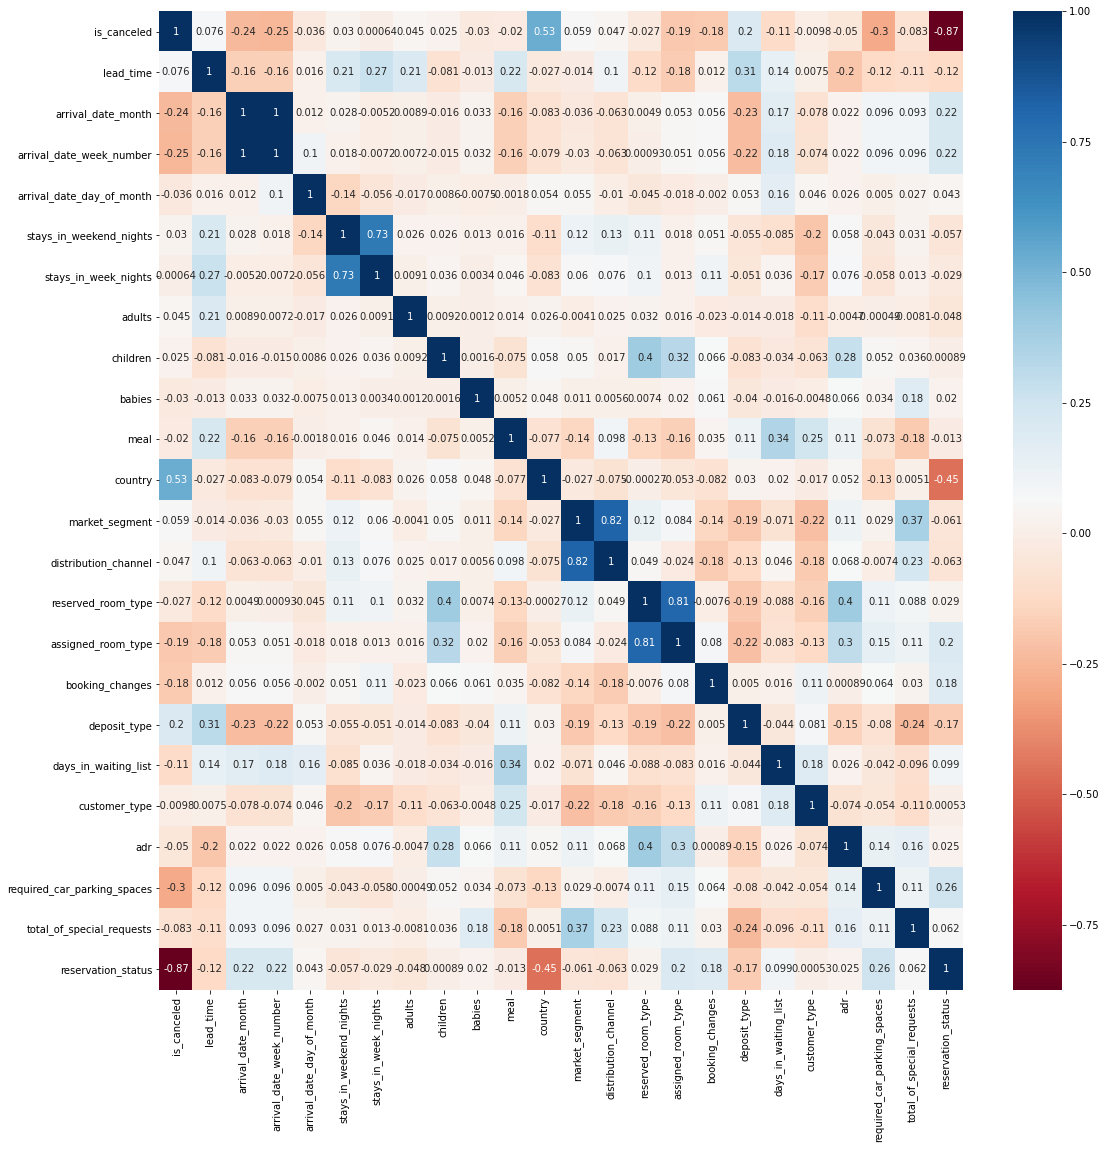

In [259]:
corrmatr = df2.corr()
top_corr_features = corrmatr.index
plt.figure(figsize=(18,18))

#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdBu")

## Handling Outliers

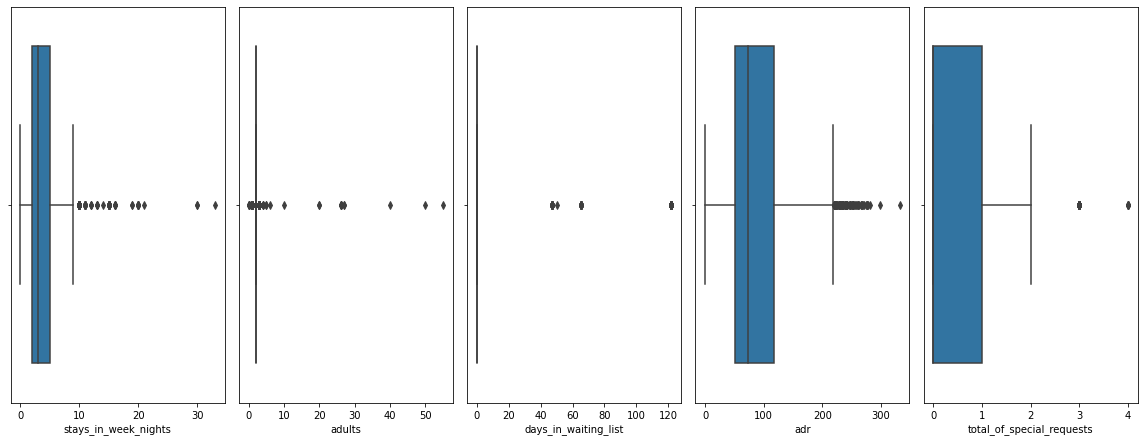

In [305]:
# Checking outliers on continious variable
features = ['stays_in_week_nights', 'adults','days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,5,n)
    sns.boxplot(df2[feature])
    n+=1
    plt.tight_layout()

# B. EDA 

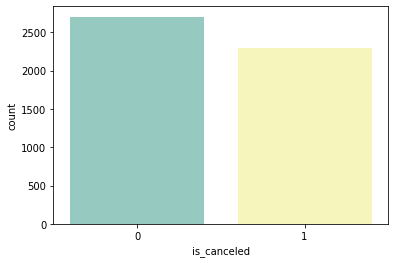

In [308]:
sns.countplot(df['is_canceled'], palette='Set3')

In [306]:
df['is_canceled'].unique()

array([0, 1])

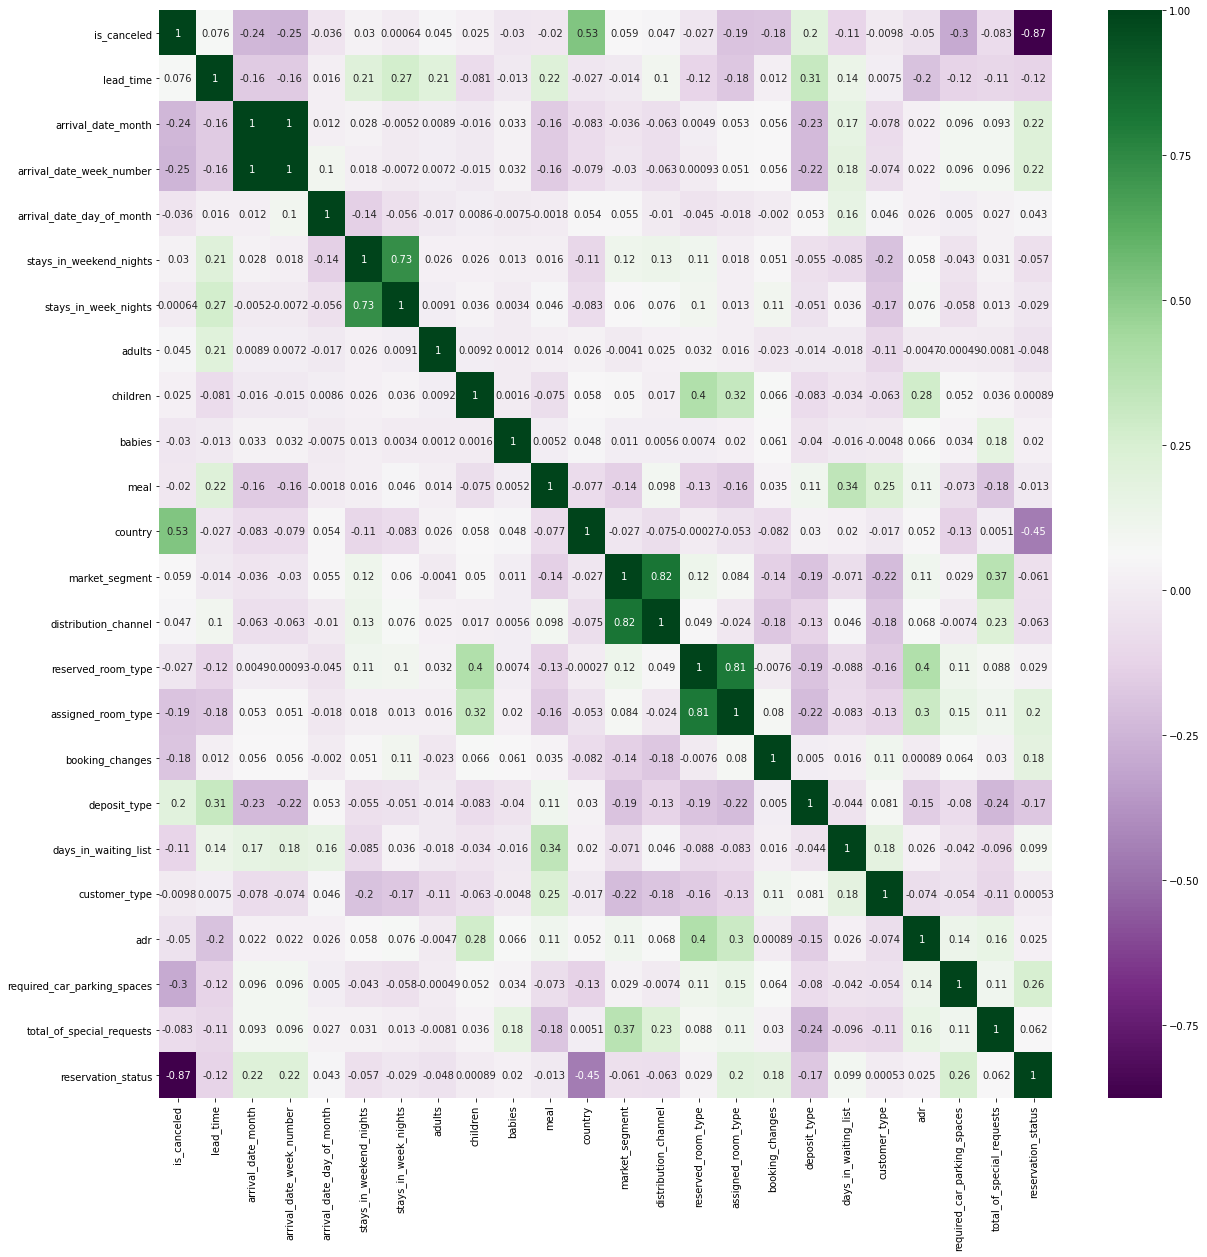

In [263]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="PRGn")

In [316]:
# Check the outliers

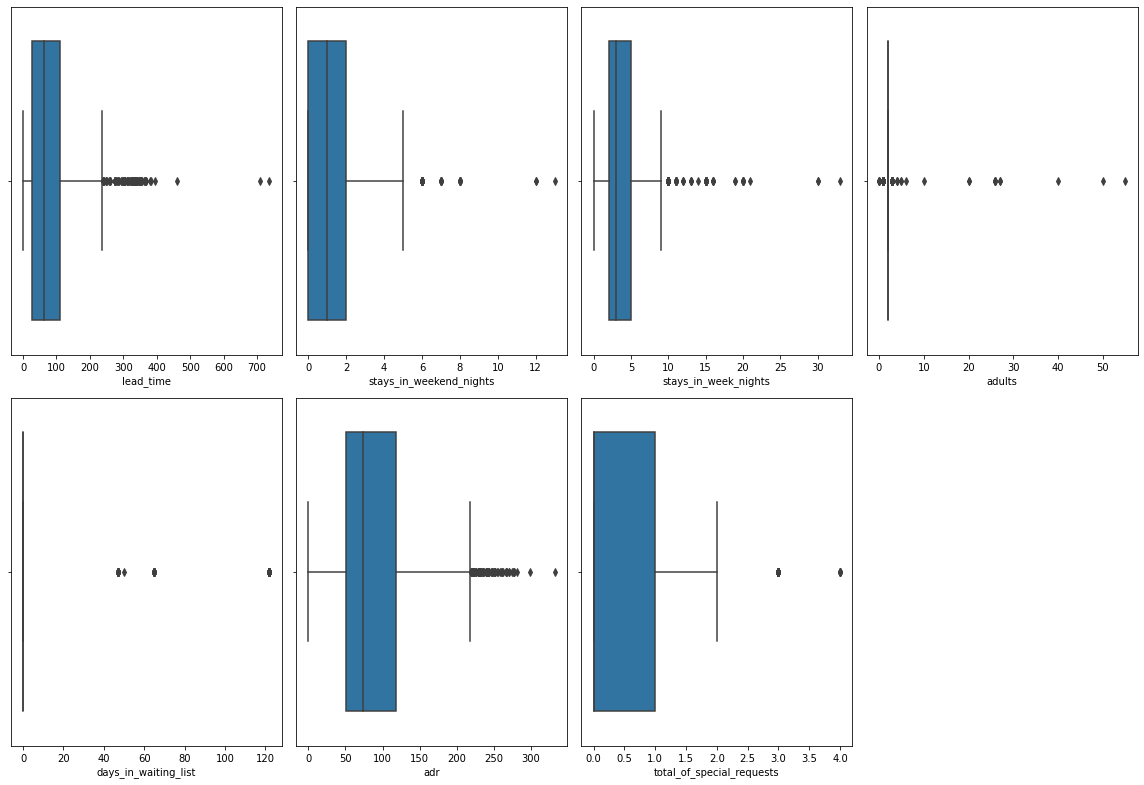

In [266]:
# Checking outliers on continious variable
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,16))
for feature in features:
    plt.subplot(3,4,n)
    sns.boxplot(df2[feature])
    n+=1
    plt.tight_layout()

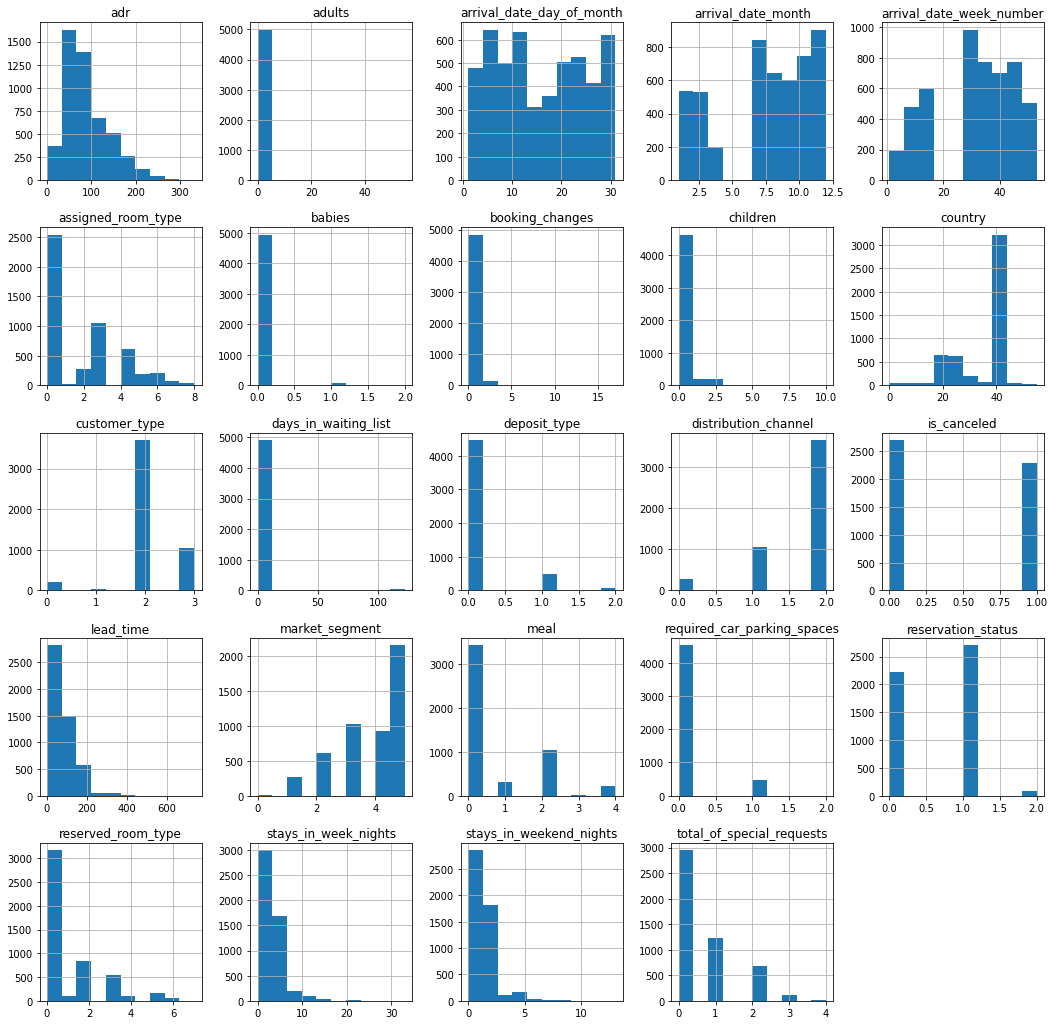

In [299]:
# EXPLORE CONT FEATURE
df2.hist(figsize=(18,18))
plt.show()

-Berdasarkan boxplot, ditemukan beberapa variable yang memiliki rentang outlier atau nilai ekstrim yang cukup jauh. 
- Perlu diketahui juga nanti apabila variable ini akan di pertahankan dalam proses prediksi, maka kemungkinan besar akan dilakukan menggunakan Robust Scaler, sehingga data akan lebih kuat terhadap pengaruh outlier. 
- Namun jika di perhatikan, nilai outlier yang ada pada variable - variable ter sebut dirasa sangat wajar jika di kaitkan dengan definisi variable, misalnya saja total of special request, yang mengartikan jumlah request khusus yang di pesan oleh pemesan, maksimal memang 2 tetapi wajar jika ada beberapa orang yang memesan dengan jumlah 3 atau 4 pesanan. 
- Sehingga dalam proces machine learning dirasa perlu melakukan scaling..

Resort Hotel    5001
Name: hotel, dtype: int64

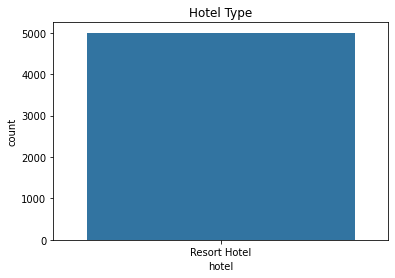

In [268]:
sns.countplot(x='hotel', data=df) 
plt.title('Hotel Type')
df['hotel'].value_counts()
# NO CITY HOTEL INCLUDED IN DATA

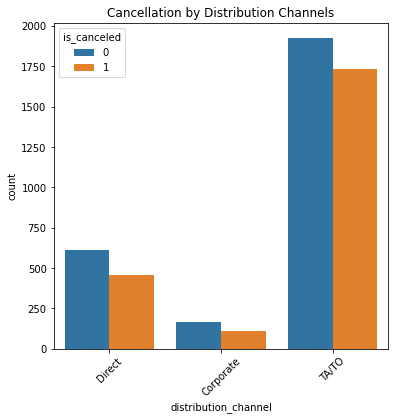

In [269]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.show()
# Reservations from Travel Agents or Tour Operators are more likely to be canceled

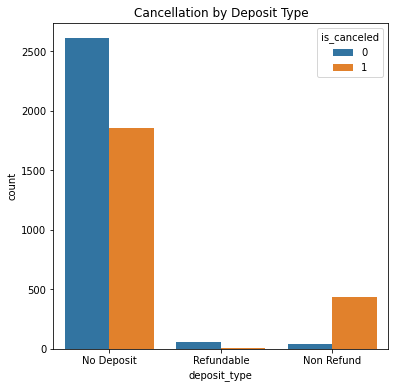

In [309]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Deposit Type')
sns.countplot(x='deposit_type',hue='is_canceled',data=df)
plt.show()

<Figure size 576x720 with 0 Axes>

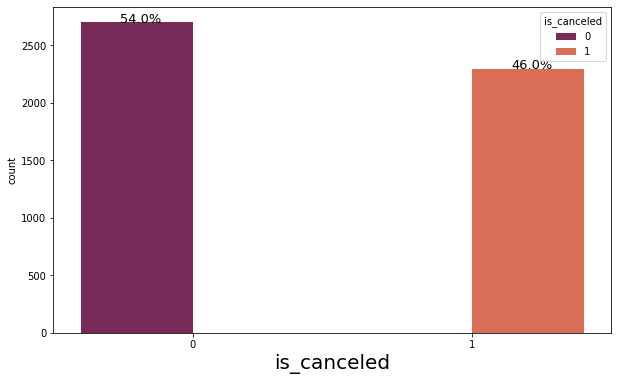

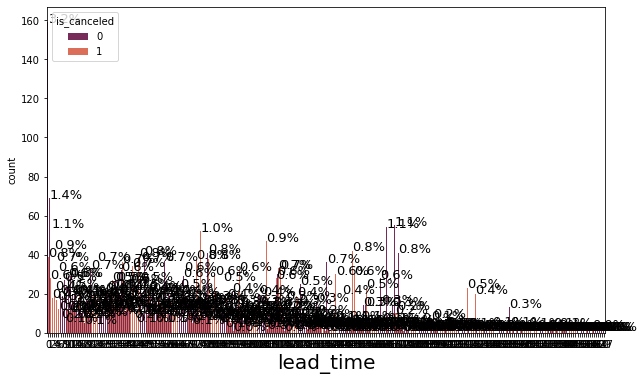

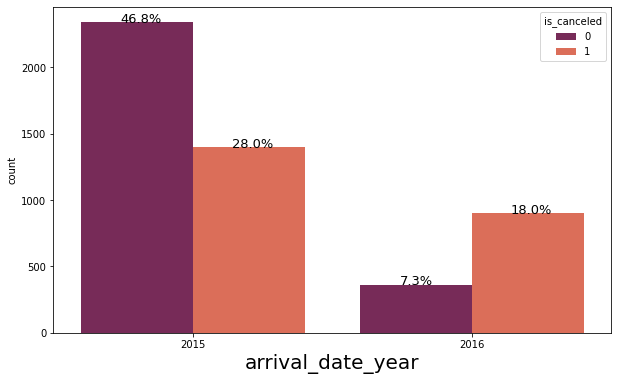

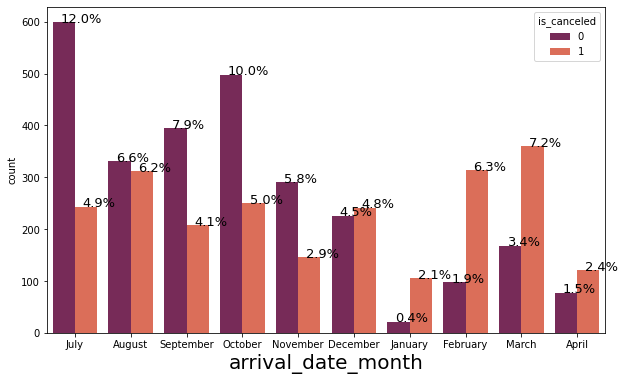

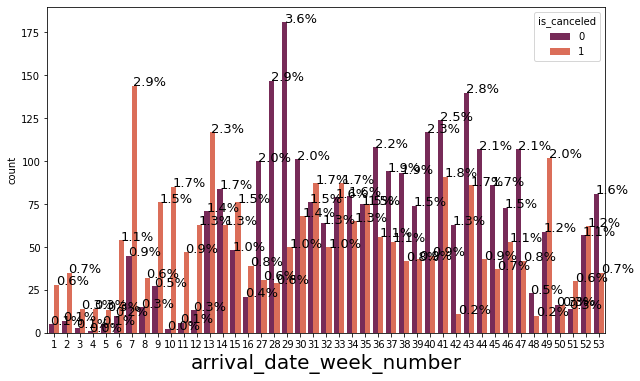

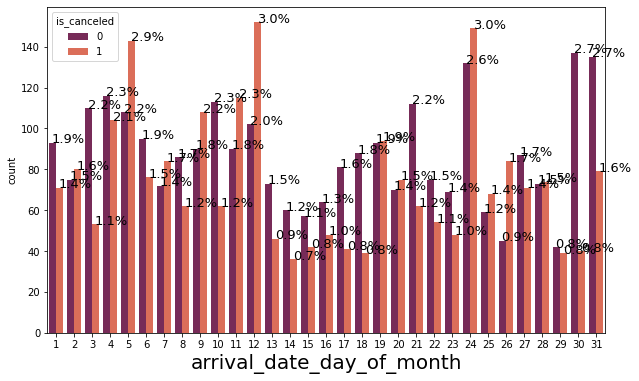

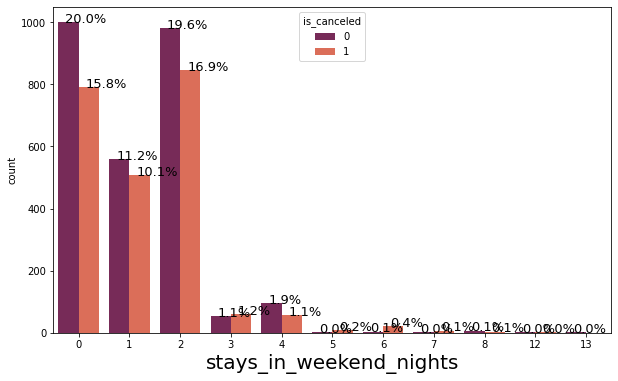

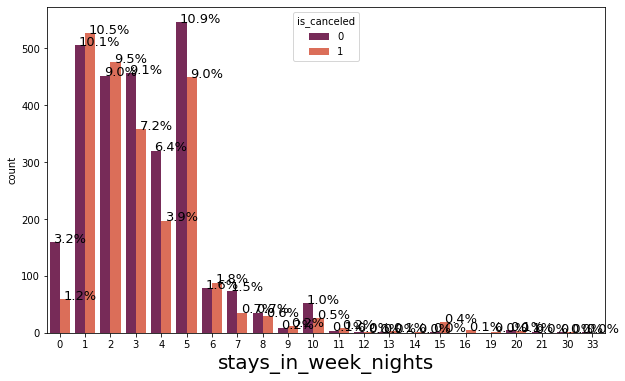

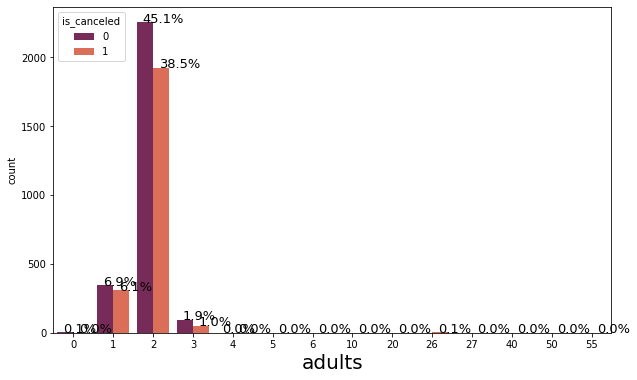

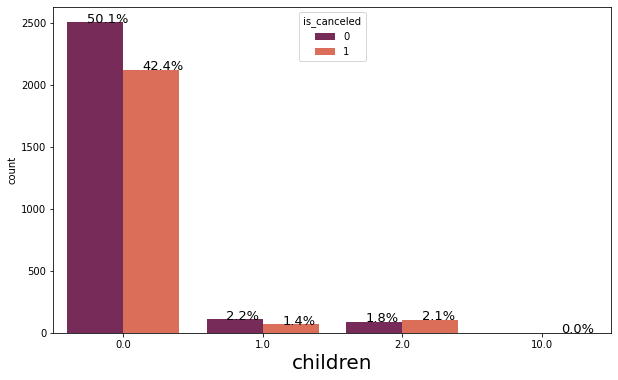

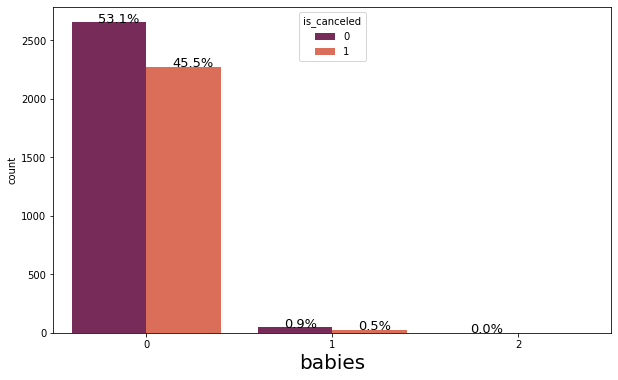

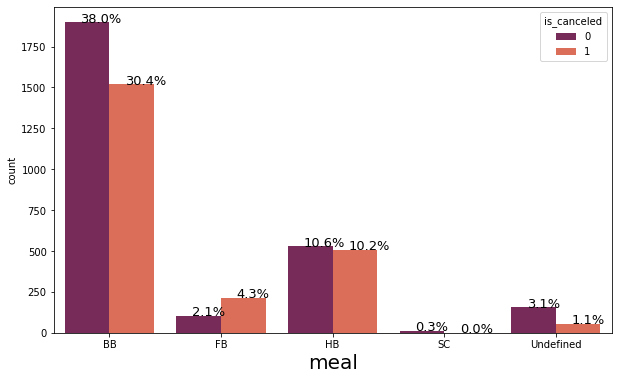

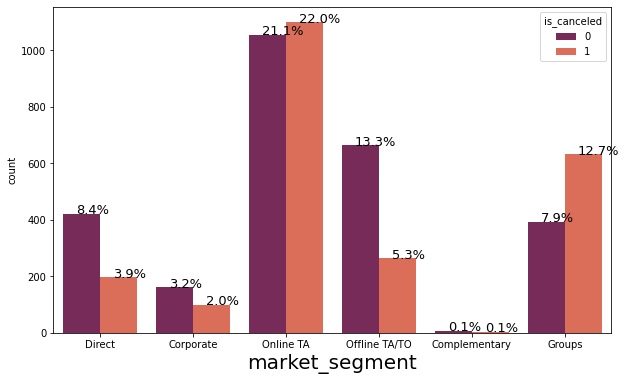

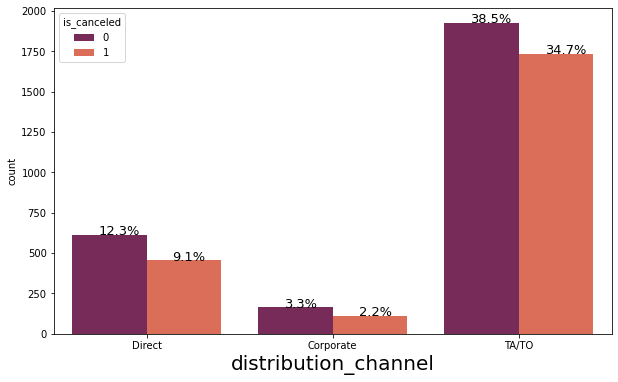

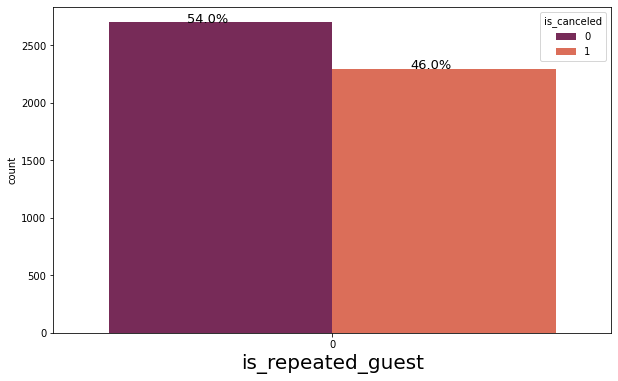

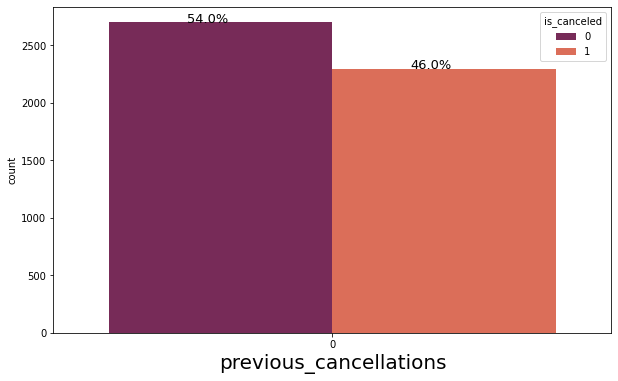

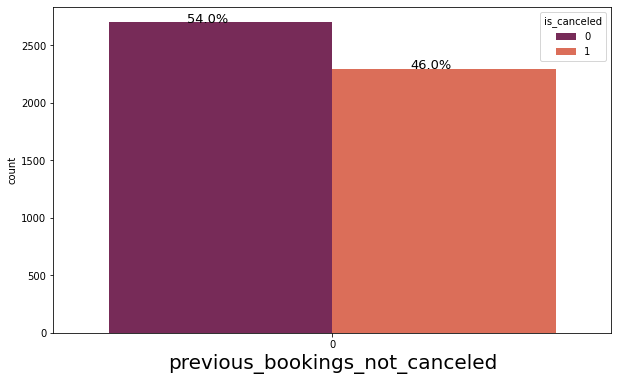

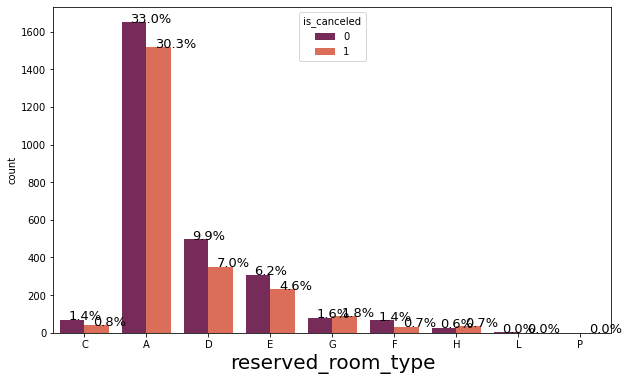

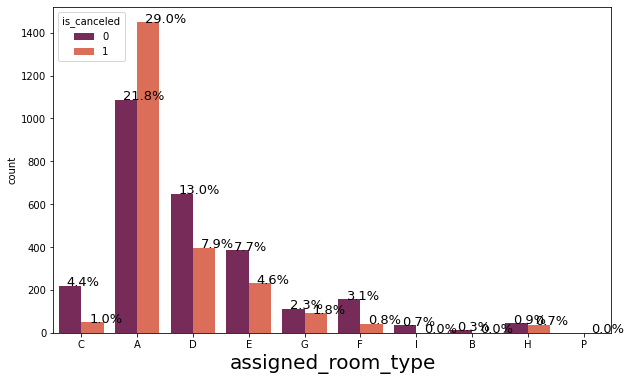

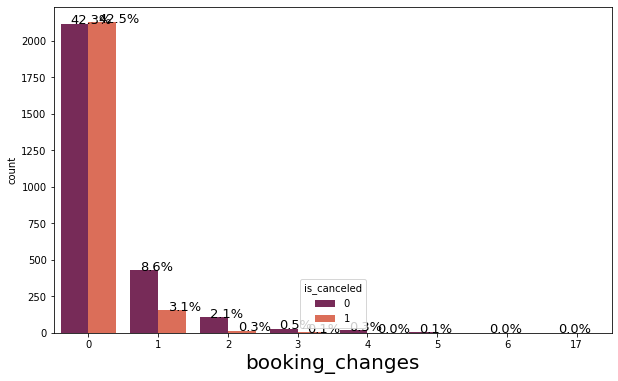

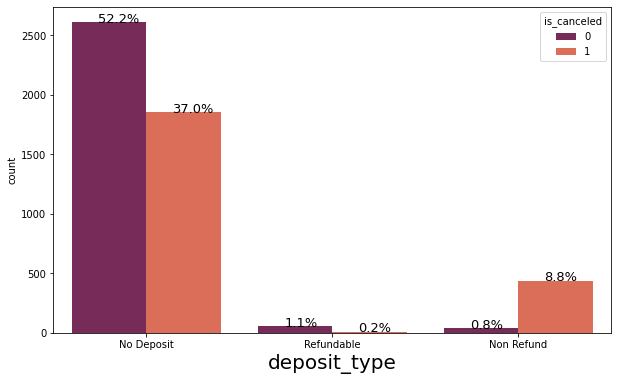

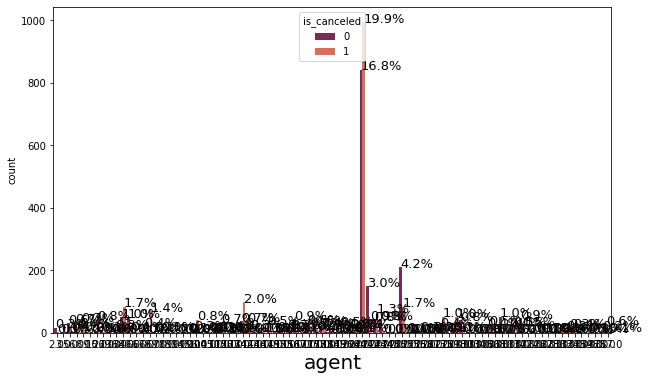

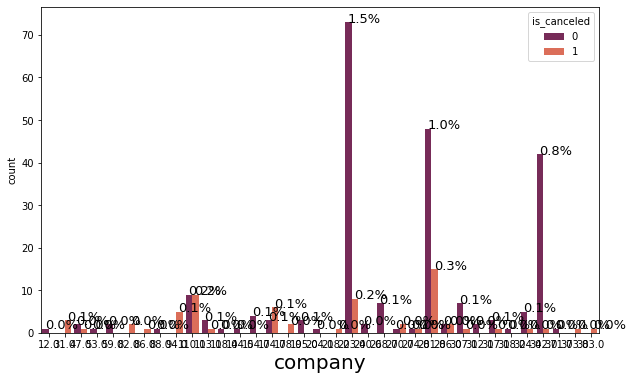

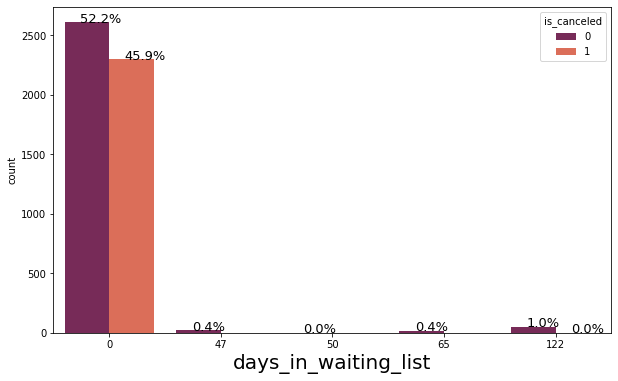

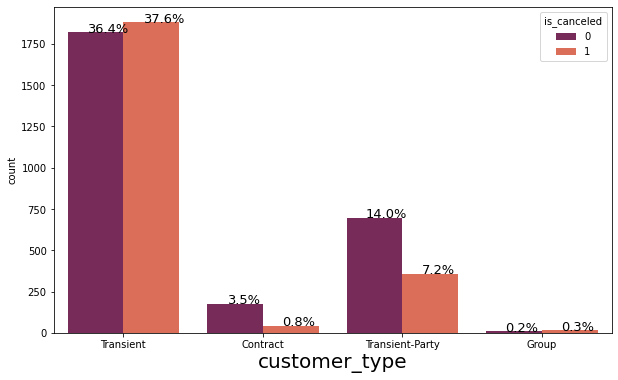

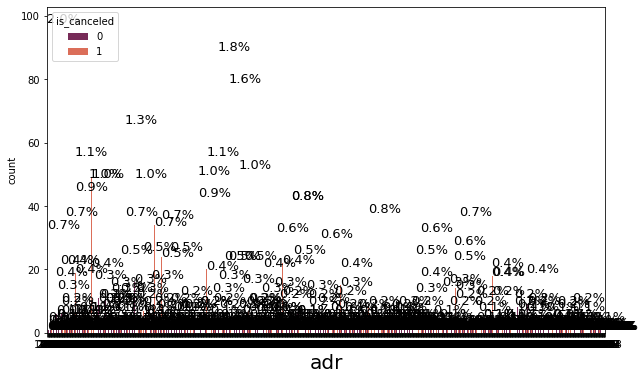

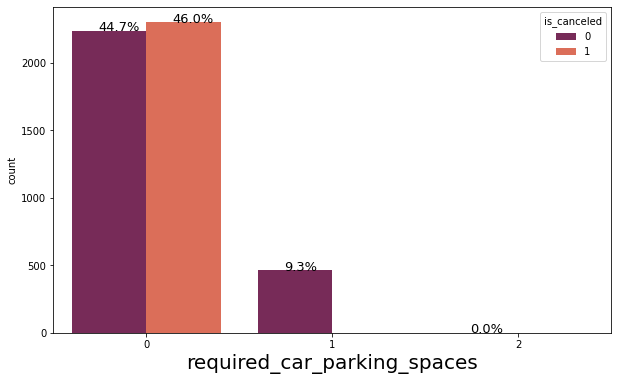

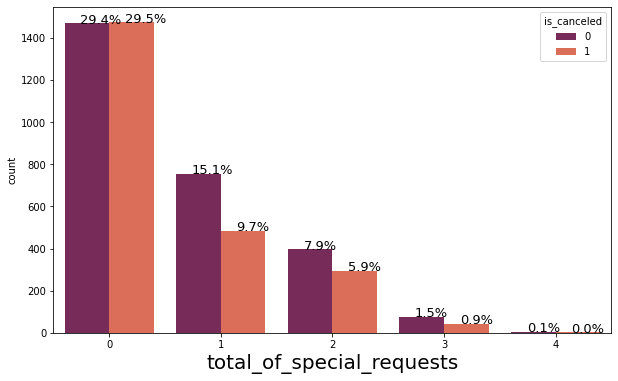

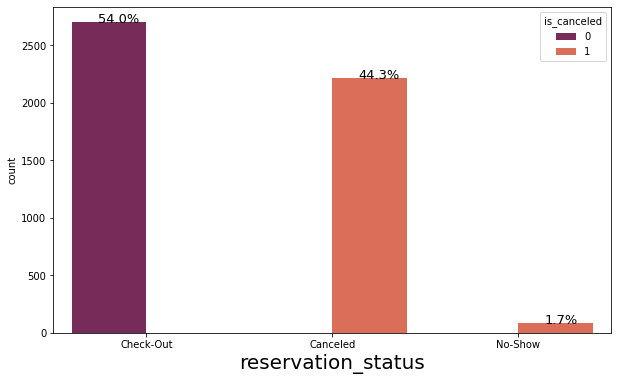

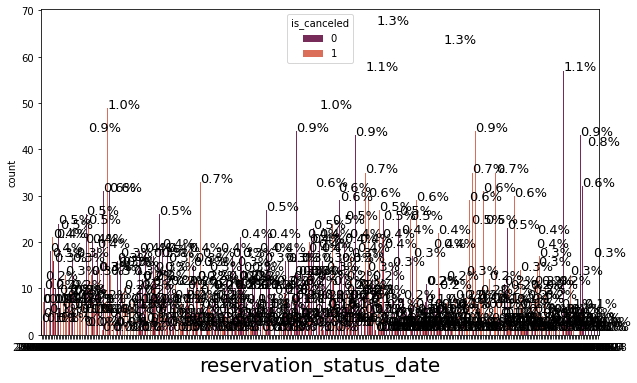

In [321]:
%matplotlib inline
plt.figure(figsize=(8,10))
for columns in df.drop(columns=['hotel', 'country']):
    plt.figure(figsize = (10,6))
    ax = sns.countplot(x = columns, data = df, hue = 'is_canceled',palette="rocket")
     
    total = len(df[columns])
    for fit in ax.patches:
        pct = '{:.1f}%'.format(100 * fit.get_height()/total)
        xpos = fit.get_x() + 0.14
        ypos = fit.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(columns, fontsize = 20)    
    plt.show()

Penjelasan:
- Jumlah kedatangan terbanyak ada di bulan JULY dengan 20% dari total kedatangan, dan hanya 8.1% yang melakukan pembatalan.
- Tipe ruangan yang di reservasi kebanyakan tipe A dengan total 35% dari total semua pemesanan, dengan 20% pembatalan.
- Tipe ruangan yang di berikan kebanyakan juga tipe A, sebanyak 23%, dan sisanya 19% di batalkan.
- Sebagian besar dari pemesan tidak melakukan jaminan deposit (64%).
- Tipe booking yang terbanyak adalah Transient, yaitu ketika booking ini dilakukan mandiri.
- Dari total semua status reservasi, ada 64% yang selesai dengan check out, 34.6% di batalkan dan sisanya tidak hadir.

# C. Model Building & Hyper-parameter Tuning (30 poin)

- Before Tuning
- Model Sebelum Hyperparameter Tuning

I'll try some classification models

In [271]:
X = df2.drop(['is_canceled'], axis=1)
Y = df2['is_canceled']
# SPLITTING TRAIN & TEST DATA 80
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)
# Menggunakan RobustScaler dikarenakan terdapat banyak outlier di dalam data
x_train = RobustScaler().fit_transform(x_train)
x_test = RobustScaler().fit_transform(x_test)

#### Menggunakan 80 percent train, dikarenakan mengambil jumlah row yang sebanyak 5000, dan based on experience dari percobaan pada tuning sebelumnya lebih baik menggunakan 80 percent train.

In [272]:
model_LR = LogisticRegression()
model_RF = RandomForestClassifier()
model_DT = DecisionTreeClassifier()
model_LR.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

LogisticRegression()
              precision    recall  f1-score   support

           0       0.37      0.84      0.51       310
           1       0.83      0.36      0.50       690

    accuracy                           0.51      1000
   macro avg       0.60      0.60      0.51      1000
weighted avg       0.69      0.51      0.50      1000



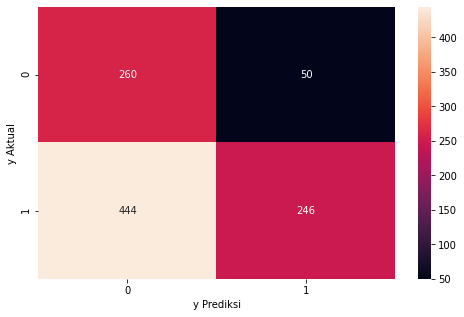

tn = 260 fp = 50 fn = 444 tp = 246




RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.28      0.82      0.41       310
           1       0.28      0.03      0.06       690

    accuracy                           0.28      1000
   macro avg       0.28      0.43      0.23      1000
weighted avg       0.28      0.28      0.17      1000



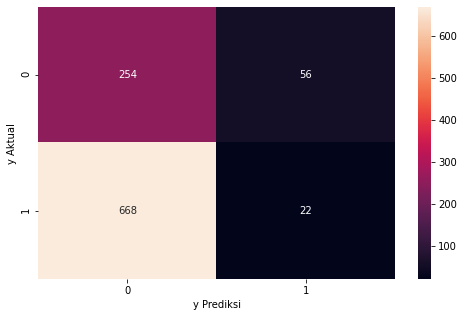

tn = 254 fp = 56 fn = 668 tp = 22




DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       310
           1       0.07      0.03      0.04       690

    accuracy                           0.02      1000
   macro avg       0.03      0.02      0.02      1000
weighted avg       0.05      0.02      0.03      1000



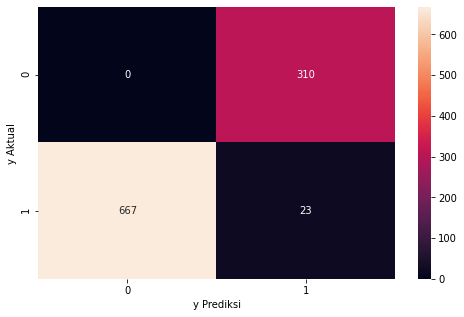

tn = 0 fp = 310 fn = 667 tp = 23






In [273]:
for model in [logistic_regression, random_forest, decision_tree]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print(classification_report(y_test, y_pred))
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('tn =', tn, 'fp =', fp, "fn =", fn, "tp =", tp)
    print('\n')
    print('\n')

In [274]:
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
names = ["LogisticRegressionModel","KNN_Model","DecisionTree_Model","Random_Forest_Model"]

In [275]:
print('Model Validation Accuracies:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_test))

Model Validation Accuracies:

LogisticRegressionModel : 0.506
KNN_Model : 0.384
DecisionTree_Model : 0.023
Random_Forest_Model : 0.283


<hr>

#### Pada 3 model di atas, terlihat Model yang memiliki score accuracy tertinggi adalah Logistic Regression
#### Sedangkan, Decision Tree Model memiliki accuracy score terendah. Sehingga, untuk selanjutnya, Decision Tree model tidak akan digunakan untuk hyperparameter Tuning.

<hr>

## USING KFolds

In [278]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits =10 , shuffle=True, random_state=0)
clf = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(clf, x_train, y_train, cv= kfold, scoring=scoring)
print(results)
print("10 Fold cross validation average accuracy: %.3f" %(results.mean()))

[0.995      0.9825     0.9825     0.98       0.99       0.9875
 0.9725     0.9825     0.9775     0.98746867]
10 Fold cross validation average accuracy: 0.984


In [279]:
kfold = KFold(n_splits =10 , shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
scoring = 'accuracy'
results = cross_val_score(clf, x_train, y_train, cv= kfold, scoring=scoring)
print(results)
print("10 Fold cross validation average accuracy: %.3f" %(results.mean()))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10 Fold cross validation average accuracy: 1.000


In [280]:
kfold = KFold(n_splits =10 , shuffle=True, random_state=0)
clf = RandomForestClassifier()
scoring = 'accuracy'
results = cross_val_score(clf, x_train, y_train, cv= kfold, scoring=scoring)
print(results)
print("10 Fold cross validation average accuracy: %.3f" %(results.mean()))

[1.     1.     0.995  1.     0.9975 1.     0.995  1.     1.     1.    ]
10 Fold cross validation average accuracy: 0.999


####  - Random Forest dan Logistic Regression terlihat menunjukkan model yang baik. Sedangkan, Descision Tree terlihat overfitting.
####  - Sehingga, dengan menggunakan Kfolds, model terbaik adalah Logistic Regression

## BEST MODEL HYPERPARAMETER TUNING

In [283]:
# SET PARAMETER
max_depth =  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
min_samples_leaf = [1, 2, 4]
min_samples_split= [2, 5, 10]
n_estimators= [200, 400, 600, 800, 1000, 1400, 1800]
bootstrap =[True,False]
max_features = ['auto', 'sqrt']


param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
         'n_estimators':n_estimators, 'bootstrap': bootstrap , 'max_features' :max_features}
param

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1400, 1800],
 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt']}

### RandomizedSearchCV

In [284]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
model_RS = RandomizedSearchCV(
    estimator = model, param_distributions= param, cv = 5, error_score=0.0
)


In [285]:
model_RS.fit(x_train, y_train)
model_RS.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [286]:
model_HP= RandomForestClassifier(n_estimators = 1000,min_samples_split= 2,min_samples_leaf= 1,max_depth= 90,
                                  max_features= 'auto',bootstrap= False)

model_HP.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, n_estimators=1000)

In [287]:
y_pred = model_HP.predict(x_test)

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.84      0.42       310
           1       0.31      0.03      0.06       690

    accuracy                           0.28      1000
   macro avg       0.29      0.44      0.24      1000
weighted avg       0.30      0.28      0.17      1000



### GridSearchCV

In [289]:
# I make a different parameter for grid search because it takes longer time
max_depth =  [20,80,110]
min_samples_leaf = [2,4]
min_samples_split= [5,10]
n_estimators= [400,800,1000]

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
         'n_estimators':n_estimators}
param

{'max_depth': [20, 80, 110],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [400, 800, 1000]}

In [290]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
model_GS = GridSearchCV(
    model, param, cv = 5
)

In [291]:
model_GS.fit(x_train, y_train)
model_GS.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 800}

In [292]:
model_HP2= RandomForestClassifier(n_estimators = 400,min_samples_split= 2,min_samples_leaf= 2, max_depth=20)

model_HP2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=400)

In [293]:
y_pred = model_HP2.predict(x_test)

In [294]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.89      0.44       310
           1       0.35      0.03      0.05       690

    accuracy                           0.29      1000
   macro avg       0.32      0.46      0.24      1000
weighted avg       0.33      0.29      0.17      1000



**MODEL DENGAN ACCURACY SCORE TERBAIK: RANDOM FOREST WITH GridSearchCV**

*1. Before Tunning*

- Cancel = 1 (Positive)
- No Cancel =  0 (Negative)

- Logistic Regression

        F1 Score : 0.51
        TN = 260 FP = 50 FN = 444 tp = 246

- RandomForest Classifier

        F1 Score : 0.28
        tn = 254 fp = 56 fn = 668 tp = 22

- Decision Tree Classifier

        F1 Score : 0.02
        tn = 0 fp = 310 fn = 667 tp = 23



- Evaluasi Keseluruhan terhadap dampak bisnis

1. Ketika diprediksi No Cancel ( Negative ) dan aktual Cancel (Positive) dalam booking case. Prediksi 0 dan aktual nya 1. Dapat dilihat jumlah `TN`,`FP`,`FN`,`TP` yang tertera pada evaluation model.

Langkah yang baik untuk meningkatkan performa model adalah meningkatkan nilai: 

- a. Precision Negative Score atau 

- b. Recall Positive Score.

Dengan meningkatkan nilai (a.) Sehingga jumlah user yg diprediksi no cancel booking dan actual cancel akan menurun

Dengan meningkatkan nilai (b.) Sehingga jumlah user aktual user no cancel akan semakin presisi, semakin tahu kondisi aktualnya.

Penjelasan False Negative dan False Positive:

   **False Negative = Actual: Melakukan Cancel Booking , prediction: Tidak Cancel**
    
   **False Positive = Actual: Tidak melakukan Cancel, prediction: Melakukan Cancel**

Dalam hal ini menurut pendapat saya, hal yang harus dilakukan adalah mengurangi nilai False Positive, dikarenakan customer pada kenyataannya, datang atau melakukan booking, namun pihak hotel memprediksi customer tidak datang/cancel booking. Dikarenakan pihak hotel tidak melakukan konfirmasi ulang kepada customer melalui telepon/email untuk memastikan kapan cutomer akan datang dan waktu kedatangan mereka. sehingga, kamar hotel yang tersedia, tidak available dan dapat diberikan kepada customer lainnya. Sehingga, dalam hal ini dampak terhadao bisnis perhotelan, dapat menjadikan citra hotel yang bersangkutan menjadi buruk, dan lack of trust daripada customer yang potensial.

### Sehingga, dikarenakan ingin mengurangi FP, makan model yang akan dipilih adalah model dengan score precision tertinggi:

In [65]:
# Model
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

In [66]:
for model in [logistic_regression, random_forest, decision_tree]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print(classification_report(y_test, y_pred))
    print('\n')

LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       310
           1       0.99      0.97      0.98       690

    accuracy                           0.97      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.97      0.97      0.97      1000



RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       310
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000



DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000

In [296]:
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),
          RandomForestClassifier()]
names = ["LogisticRegression","KNN","DecisionTree","Random_Forest"]

In [297]:
from sklearn.metrics import precision_score
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(name,':',"%.3f" % (precision_score(y_test, y_pred)))

LogisticRegression : 0.831
KNN : 0.920
DecisionTree : 0.069
Random_Forest : 0.314


It's good. There are 2 models with high precision ( DECSION TREE OVERFIT *we've checked before)

Let's see False Positive in number

LogisticRegression :


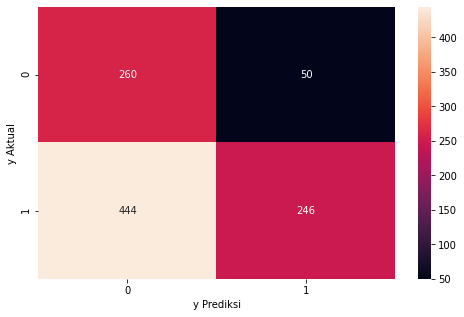

KNN :


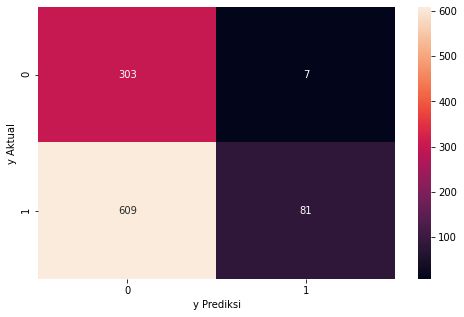

DecisionTree :


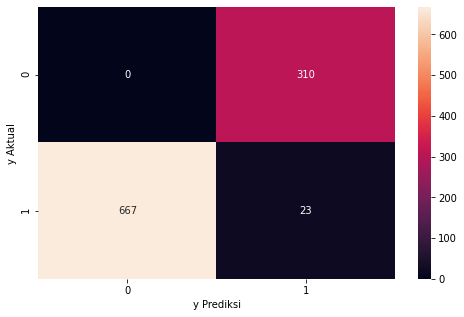

Random_Forest :


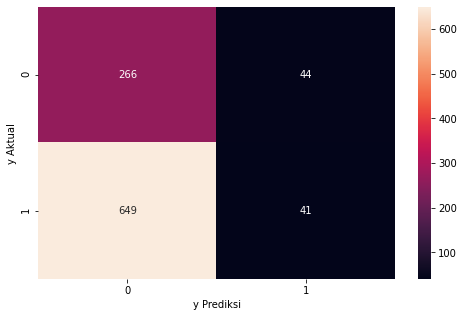

In [298]:
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(name,':' )
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
    plt.xlabel("y Prediksi")
    plt.ylabel("y Aktual")
    plt.show()

Berdasarkan Confusion Matrix di atas, terlihat FP pada KNN model hanya 7 sehingga dapat disimpulkan model terbaik untuk mengurangi nilai FP adalah KNN model. 
Namun, secara keseluruhan berdasarkan nilai accuracy dan f1-score (berdasaarkan model sebelum tuning, using kfolds, dan after tuning) model terbaik adalah Logistic Regression.